In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

/var/folders/q4/4l6ccgc547zfl_j4t8vqnm9c0000gn/T/ipykernel_65415/1077850603.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# DATASET_PATH = "/content/drive/MyDrive/ML_academy/task_3/atlantic.csv"
DATASET_PATH = "data/atlantic.csv"

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [4]:
df.Name.value_counts().index

Index(['            UNNAMED', '            FRANCES', '             ARLENE',
       '             BERTHA', '             DENNIS', '           FLORENCE',
       '             HELENE', '              IRENE', '              EMILY',
       '             BONNIE',
       ...
       '              EIGHT', '              PATTY', '               ALFA',
       '             EVELYN', '           NINETEEN', '              SHARY',
       '              TAMMY', '            SIXTEEN', '            FERNAND',
       '             AMELIA'],
      dtype='object', name='Name', length=288)

In [5]:
df['Name'] = df['Name'].str.strip()

In [6]:
df["Date"] = pd.to_datetime(df["Date"] , format= "%Y%m%d")

In [7]:
# Функция для преобразования времени
def convert_to_time(time_value):
    hours = time_value // 100
    minutes = time_value % 100
    return pd.Timedelta(hours=hours, minutes=minutes)

In [8]:
# Применение функции к столбцу времени
df["Time"] = df["Time"].apply(convert_to_time)

In [9]:
df['Datetime'] = df['Date'] + df['Time']
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [10]:
df.drop(["Time"], axis=1, inplace=True)

In [13]:
def convert_coordinates(coordinate):
    if coordinate[-1] in ('E', 'N') :
        return float(coordinate[:-1])
    elif coordinate[-1] in ('W', 'S'):
        return -float(coordinate[:-1])
    else:
        return None

In [14]:
# Применение функции к столбцу
df['Latitude_numeric'] = df['Latitude'].apply(convert_coordinates)
df['Longitude_numeric'] = df['Longitude'].apply(convert_coordinates)

In [15]:
df["Maximum Wind"].replace([-99.0], df["Maximum Wind"].median(), inplace=True)
# df.replace([-99.0, -999.0, ""], np.nan, inplace=True)

/var/folders/q4/4l6ccgc547zfl_j4t8vqnm9c0000gn/T/ipykernel_65415/1247313210.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Maximum Wind"].replace([-99.0], df["Maximum Wind"].median(), inplace=True)


In [16]:
df.set_index("Datetime", inplace=True)

In [17]:
df.head()

,ID,Name,Date,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,...,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_numeric,Longitude_numeric
Datetime,,,,,,,,,,,,,,,,,,,,,
1851-06-25 00:00:00,AL011851,UNNAMED,1851-06-25,,HU,28.0N,94.8W,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,28.0,-94.8
1851-06-25 06:00:00,AL011851,UNNAMED,1851-06-25,,HU,28.0N,95.4W,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,28.0,-95.4
1851-06-25 12:00:00,AL011851,UNNAMED,1851-06-25,,HU,28.0N,96.0W,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,28.0,-96.0
1851-06-25 18:00:00,AL011851,UNNAMED,1851-06-25,,HU,28.1N,96.5W,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,28.1,-96.5
1851-06-25 21:00:00,AL011851,UNNAMED,1851-06-25,L,HU,28.2N,96.8W,80,-999,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,28.2,-96.8


In [18]:
df.describe()

,Date,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW,Latitude_numeric,Longitude_numeric
count,49105,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1950-05-26 04:02:32.782812288,52.996273,-251.406496,-868.671031,-869.315772,-872.676428,-871.409245,-875.570940,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295,27.044904,-65.682533
min,1851-06-25 00:00:00,10.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,7.200000,-359.100000
25%,1911-11-01 00:00:00,35.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,19.100000,-81.000000
50%,1956-09-27 00:00:00,45.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,26.400000,-68.000000
75%,1989-08-10 00:00:00,70.000000,990.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,33.100000,-52.500000
max,2015-11-13 00:00:00,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000,81.000000,63.000000
std,NaN,24.671546,964.313907,353.299666,351.548910,342.153768,345.628984,333.651396,333.133376,330.526085,331.535176,328.027275,327.774794,327.021430,327.408253,10.077880,19.687240


Примеры

In [19]:
import pmdarima as pm

In [158]:
df_sorted = df.sort_index()

# Установите временной промежуток, который вы хотите рассмотреть
start_date = '1914-01-01'
end_date = '2014-12-31'

# Создайте срез данных по указанному временному промежутку
subset_df = df_sorted[start_date:end_date]

In [20]:
# Создайте новый столбец 'Year', содержащий год наблюдения
df['Year'] = df.index.year

# Сгруппируйте данные по году и посчитайте количество ураганов для каждого года
hurricanes_per_year = df.groupby('Year').size()

hurricanes_per_year.index = pd.to_datetime(hurricanes_per_year.index, format='%Y').to_period('Y').to_timestamp('Y')

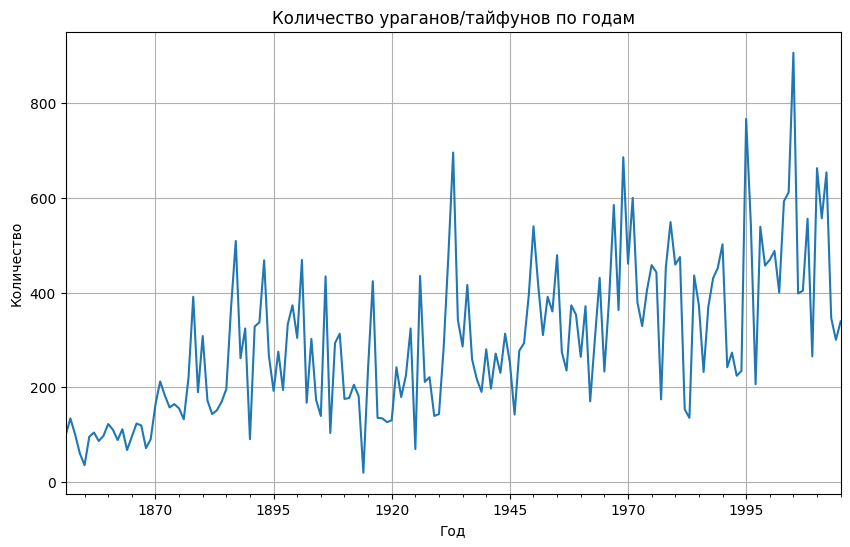

In [21]:
hurricanes_per_year.plot(kind='line', figsize=(10, 6))

plt.title('Количество ураганов/тайфунов по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.grid(True)

plt.show()

Проверка на стационарность

In [22]:
from statsmodels.tsa.stattools import adfuller

In [24]:
# Выполнение теста Дики-Фуллера
result = adfuller(hurricanes_per_year, autolag='AIC')

# Вывод результатов теста
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')

if result[0] > result[4]['5%']:
    print('Имеются единичные корни, ряд не стационарен')
else:
    print('Единичных корней нет, ряд стационарен')

ADF Statistic: -1.8643913729016115
p-value: 0.34899339486238723
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577
Имеются единичные корни, ряд не стационарен


In [27]:
diff_data = hurricanes_per_year.diff(periods=1).dropna()

result = adfuller(diff_data)

# Вывод результатов теста
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')

if result[0] > result[4]['5%']:
    print('Имеются единичные корни, ряд не стационарен')
else:
    print('Единичных корней нет, ряд стационарен')

ADF Statistic: -7.495555340329166
p-value: 4.389350653748798e-11
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577
Единичных корней нет, ряд стационарен


Как видно из выводы выше получившийся ряд первых разностей приблизился к стационарному. Для полной уверенности разобъем его на несколько промежутков и выполним статистический тест на сравнение средних двух выборок

In [28]:
import statsmodels.api as sm

In [29]:
m = diff_data.index[len(diff_data.index) // 2 + 1]

r1 = sm.stats.DescrStatsW(diff_data[m:])
r2 = sm.stats.DescrStatsW(diff_data[:m])

print('p-value: ', sm.stats.CompareMeans(r1, r2).ttest_ind()[1])

p-value:  0.927108845077558


## Построим модель временного ряда

### SARIMA

In [54]:
x = np.log(hurricanes_per_year)


In [53]:
SARIMA_model = pm.auto_arima(x,
                             start_p=1, start_q=1,
                             test='adf',
                             max_p=3, max_q=3,
                             m=12, #12 is the frequency of the cycle
                             start_P=0,
                             seasonal=True, #set to seasonal
                             d=None,
                             D=1, #order of the seasonal differencing
                             trace=False,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

print(SARIMA_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  165
Model:             SARIMAX(1, 0, 1)x(2, 1, [], 12)   Log Likelihood                -128.205
Date:                             Wed, 07 Feb 2024   AIC                            268.409
Time:                                     01:08:56   BIC                            286.592
Sample:                                 12-31-1851   HQIC                           275.795
                                      - 12-31-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0189      0.019      0.993      0.320      -0.018       0.056
ar.L1          0.9194      

In [65]:
max(x.index.year)

2015

In [66]:
# Forecast
def forecast(data, year=2016):
    n_periods = year - max(data.index.year)

    fitted, confint = SARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(years=1), 
                                periods=n_periods, freq='YE')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(data, color='#1f76b4')
    plt.plot(fitted_series, color='red')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='r', alpha=.15)

    plt.title("SARIMA - Forecast of Hurricanes")
    plt.show()
    
    return fitted_series[fitted_series.index.year == year]

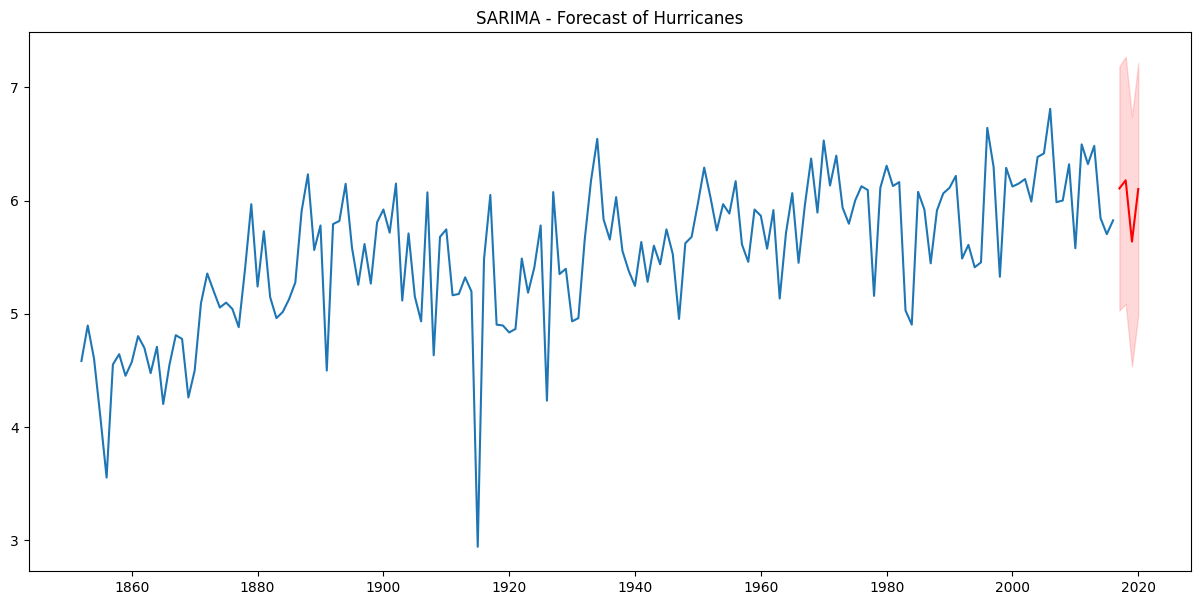

2019-12-31    447.131157
Freq: YE-DEC, dtype: float64

In [69]:
r = forecast(x, 2019)
np.exp(r)

In [50]:
fitted_series

2016-12-31     462.366803
2017-12-31     581.958671
2018-12-31     316.097120
2019-12-31     491.007556
2020-12-31     568.941055
                 ...     
2191-12-31     941.039070
2192-12-31    1003.494831
2193-12-31     859.875068
2194-12-31     815.979018
2195-12-31     856.156520
Freq: YE-DEC, Length: 180, dtype: float64

Долгота и широта

In [19]:
df[["Latitude_numeric", "Longitude_numeric"]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49105 entries, 1851-06-25 00:00:00 to 2015-11-13 12:00:00
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude_numeric   49105 non-null  float64
 1   Longitude_numeric  49105 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


In [ ]:
# df = df[['Maximum Wind', 'Latitude_numeric', 'Longitude_numeric']]
# df.head()

In [103]:
# exog_data = df[['Latitude_numeric', 'Longitude_numeric']].groupby(df['Year']).mean()
# exog_data.index = pd.to_datetime(exog_data.index, format='%Y').to_period('Y').to_timestamp('Y')

# exog_data.head()

,Latitude_numeric,Longitude_numeric
Year,,
1851-12-31,28.881633,-76.877551
1852-12-31,25.602985,-76.766418
1853-12-31,30.023000,-57.771000
1854-12-31,31.075000,-79.500000
1855-12-31,25.688571,-68.431429


Wind + Long + Lat

In [53]:
# exog_data = df[['Maximum Wind', 'Latitude_numeric', 'Longitude_numeric']]

# # exog_data.replace(-999.0, np.nan, inplace=True)

# exog_data = exog_data.groupby(df['Year']).median()
# exog_data.index = pd.to_datetime(exog_data.index, format='%Y').to_period('Y').to_timestamp('Y')

# exog_data.head()

,Maximum Wind,Latitude_numeric,Longitude_numeric
Year,,,
1851-12-31,55.0,30.05,-74.60
1852-12-31,70.0,25.95,-76.05
1853-12-31,80.0,31.25,-58.05
1854-12-31,70.0,29.65,-80.40
1855-12-31,60.0,22.20,-67.90


In [104]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [105]:
# # Инициализируем MinMaxScaler
# scaler = MinMaxScaler()
# # scaler = StandardScaler()

# # Применяем нормализацию к DataFrame
# df_normalized = pd.DataFrame(scaler.fit_transform(exog_data), columns=exog_data.columns, index=exog_data.index)

# # Выводим нормализованный DataFrame
# df_normalized

,Latitude_numeric,Longitude_numeric
Year,,
1851-12-31,0.605977,0.177234
1852-12-31,0.350706,0.180731
1853-12-31,0.694842,0.778397
1854-12-31,0.776749,0.094722
1855-12-31,0.357369,0.442980
...,...,...
2011-12-31,0.337306,0.581268
2012-12-31,0.506810,0.828562
2013-12-31,0.258213,0.787378


Попробуем другую библиотеку

<Axes: xlabel='Year'>

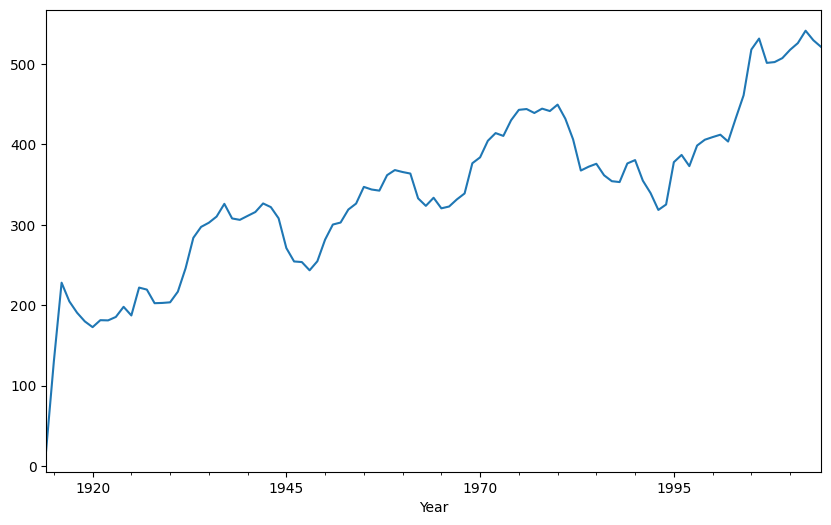

In [130]:
rolling_mean = hurricanes_per_year.rolling(window=12, min_periods=1).mean()
rolling_mean.plot(kind='line', figsize=(10, 6))

In [179]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [139]:
# Оценка сезонности
decomposition = seasonal_decompose(hurricanes_per_year, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

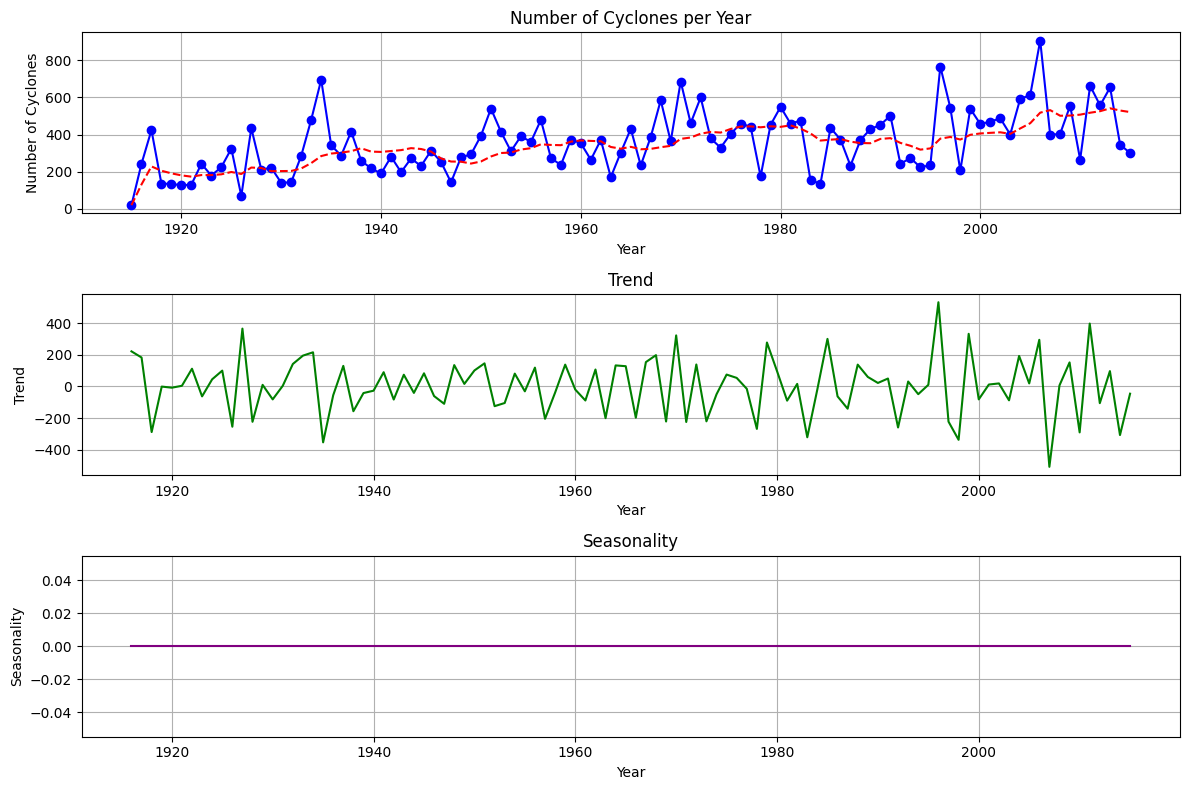

In [140]:
# Построение графиков
plt.figure(figsize=(12, 8))

# График временного ряда и скользящего среднего
plt.subplot(3, 1, 1)
plt.plot(hurricanes_per_year, marker='o', color='blue', linestyle='-')
plt.plot(rolling_mean, color='red', linestyle='--')
plt.title('Number of Cyclones per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cyclones')
plt.grid(True)

# График тренда
plt.subplot(3, 1, 2)
plt.plot(trend, color='green')
plt.title('Trend')
plt.xlabel('Year')
plt.ylabel('Trend')
plt.grid(True)

# График сезонности
plt.subplot(3, 1, 3)
plt.plot(seasonal, color='purple')
plt.title('Seasonality')
plt.xlabel('Year')
plt.ylabel('Seasonality')
plt.grid(True)

plt.tight_layout()
plt.show()

In [109]:
exog_data

,Latitude_numeric,Longitude_numeric
Year,,
1851-12-31,28.881633,-76.877551
1852-12-31,25.602985,-76.766418
1853-12-31,30.023000,-57.771000
1854-12-31,31.075000,-79.500000
1855-12-31,25.688571,-68.431429
...,...,...
2011-12-31,25.430880,-64.036266
2012-12-31,27.607951,-56.176606
2013-12-31,24.415029,-57.485549


In [113]:
# SARIMAX Model
SARIMAX_model = pm.auto_arima(hurricanes_per_year, exogenous=df_normalized, 
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

SARIMAX_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  165
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                -980.574
Date:                            Tue, 06 Feb 2024   AIC                           1971.148
Time:                                    22:20:00   BIC                           1986.300
Sample:                                12-31-1851   HQIC                          1977.303
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     43.7110     12.656      3.454      0.001      18.906      68.516
ar.L1          0.2387      0.078      3.064      0.002       0.086       0.391
ar.S.L12      -0.6685      0.076     -8.786      0.000      -0.818      -0.519
ar.S.L24      -0.3362      0.078     -4.293      0.000      -0.490      -0.183
sigma2      2.074e+04   2598.958      7.979      0.000    1.56e+04    2.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.92   Prob(JB):                         0.72
Heteroskedasticity (H):               1.91   Skew:                             0.15
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

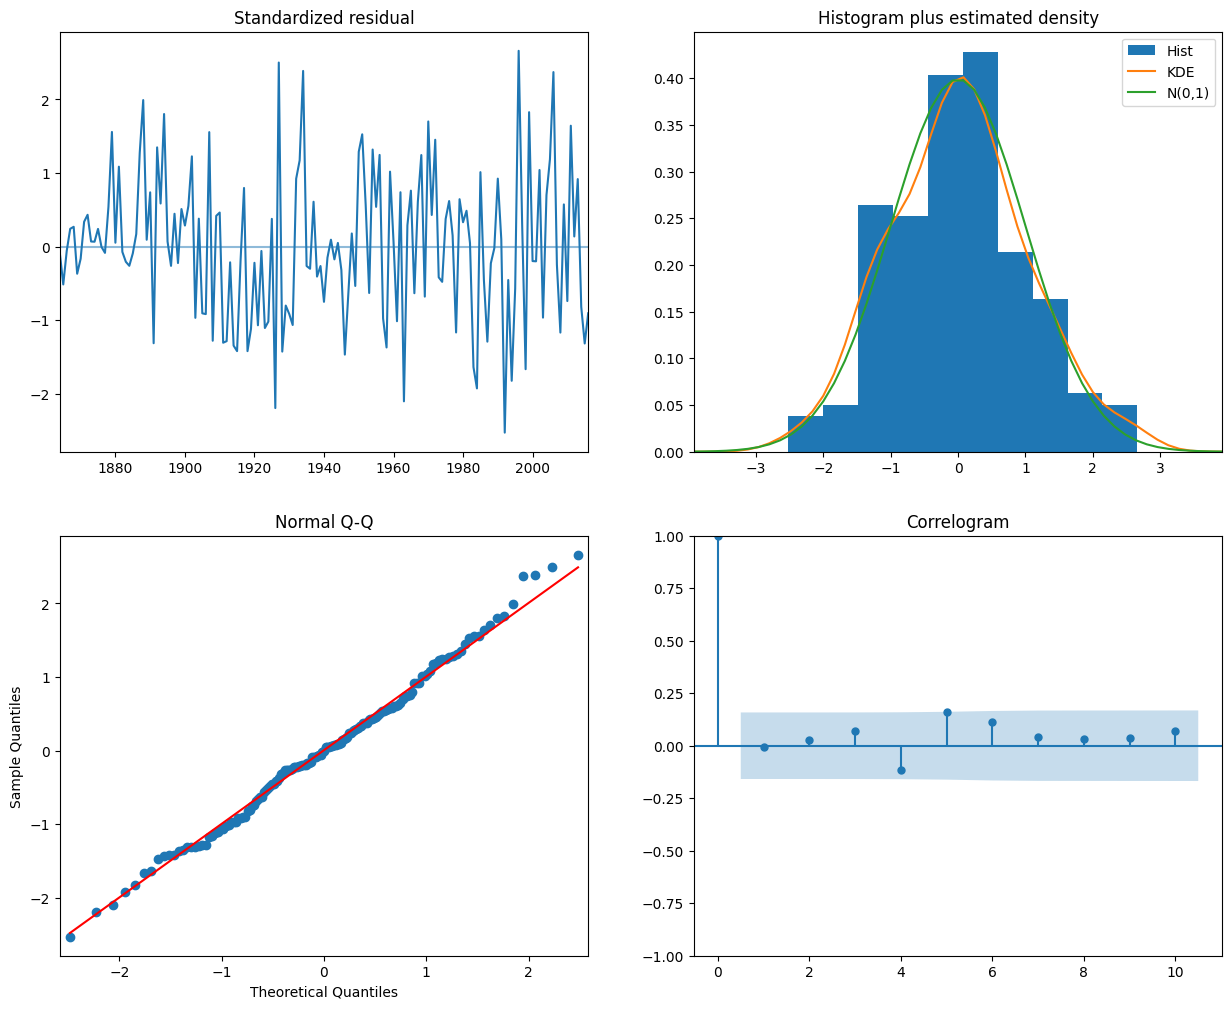

In [107]:
SARIMAX_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [110]:
def sarimax_forecast(SARIMAX_model, exog_data, data, periods=24):
    # Forecast
    n_periods = periods

    mean_latitude = exog_data['Latitude_numeric'].median()
    mean_longitude = exog_data['Longitude_numeric'].median()
    mean_wind = exog_data['Maximum Wind'].median()

    forecast_df = pd.DataFrame({
        "Latitude_numeric": mean_latitude,
                                "Longitude_numeric": mean_longitude,
                                "Maximum Wind": mean_wind
                                },
                    index = pd.date_range(data.index[0]+ pd.DateOffset(years=1), periods = n_periods, freq='YE'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[["Latitude_numeric", "Longitude_numeric", 'Maximum Wind']])
    index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(years=1), periods = n_periods, freq='YE')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    print(fitted)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(data, color='#1f76b4')
    # plt.plot(hurricanes_per_year[-5:, color='red')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Hurricanes per Year")
    plt.show()

sarimax_forecast(SARIMAX_model, periods=70, exog_data=exog_data, data=hurricanes_per_year)

KeyError: 'Maximum Wind'

SARIMA model

In [183]:
SARIMA_model = pm.auto_arima(hurricanes_per_year,
                             start_p=1, start_q=1,
                             test='adf',
                             max_p=3, max_q=3,
                             m=17, #12 is the frequency of the cycle
                             start_P=0,
                             seasonal=True, #set to seasonal
                             d=None,
                             D=1, #order of the seasonal differencing
                             trace=False,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True)

print(SARIMA_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  165
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 17)   Log Likelihood                -935.867
Date:                            Wed, 07 Feb 2024   AIC                           1877.733
Time:                                    00:17:54   BIC                           1886.705
Sample:                                12-31-1851   HQIC                          1881.379
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8539      0.045    -18.850      0.000      -0.943      -0.765
ma.S.L17      -0.8268      0.127   

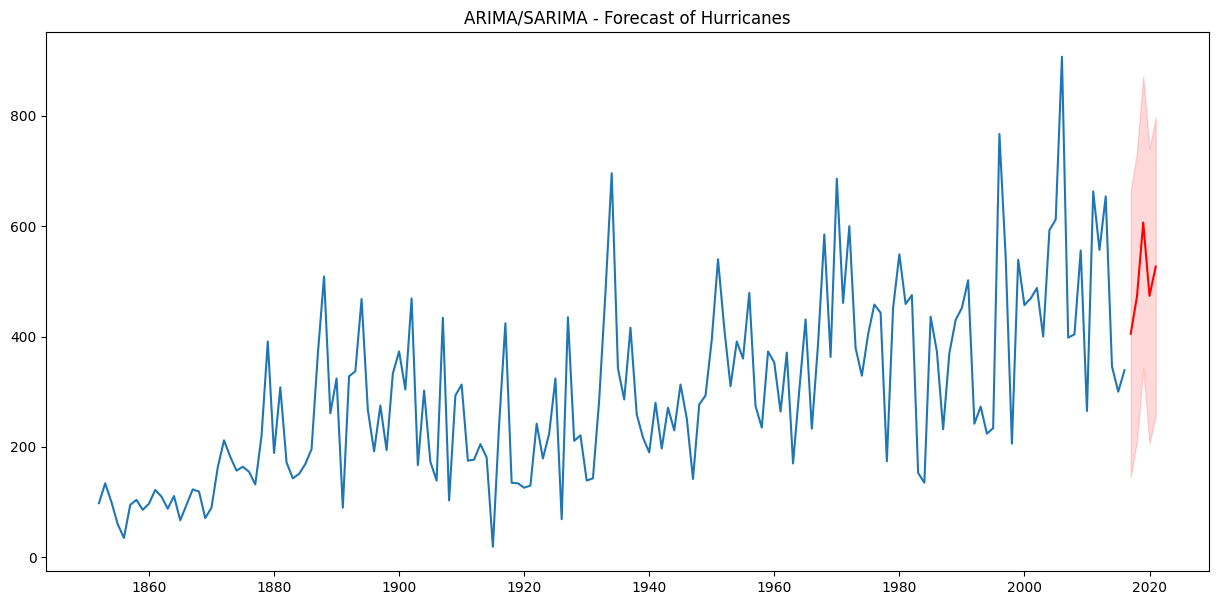

In [186]:
def forecast(ARIMA_model, periods=5):
    # Forecast
    n_periods = periods
    ##
    
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(hurricanes_per_year.index[-1] + pd.DateOffset(years=1), periods=n_periods, freq='YE')
    # print(confint)

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(hurricanes_per_year, color='#1f76b4')
    plt.plot(fitted_series, color='red')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='r', alpha=.15)

    plt.title("ARIMA/SARIMA - Forecast of Hurricanes")
    plt.show()
    
forecast(SARIMA_model, periods=5)